In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
#df

In [23]:
df_men = df[df['Sex'] == 1]
#df_men
#len(df_men)

In [24]:
#df_men_pres = df_men[df_men['Heart Disease'] == 'Presence'].reset_index(drop = True)
#df_men_pres
#len(df_men_pres)

In [31]:
df_men_abs = df_men[df_men['Heart Disease'] == 'Absence'].reset_index(drop = True)
df_men_abs
#len(df_men_abs)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
1,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
2,59,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence
3,53,1,4,142,226,0,2,111,1,0.0,1,0,7,Absence
4,44,1,3,140,235,0,2,180,0,0.0,1,0,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,43,1,4,150,247,0,0,171,0,1.5,1,0,3,Absence
79,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
80,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
81,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence


In [32]:
class LinearRegression():
    def estimate_coef(self, x, y, n):
    # mean of x and y vector
        m_x = np.mean(x)
        m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
        SS_xy = np.sum(y*x) - n*m_y*m_x
        SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
        b_1 = SS_xy / SS_xx
        b_0 = m_y - b_1*m_x

        return (b_0, b_1)

    def regression_line(self, x, y, b):
    
    # predicted response vector
        global y_pred 
        y_pred = b[0] + b[1]*x
        
    def main(self, x, y, n):


        b = self.estimate_coef(x, y, n)
        print(self.estimate_coef(x,y,n))
        self.regression_line(x,y,b)

In [33]:
LR_abs_men = LinearRegression()

In [34]:
x = df_men_abs['Age']
y = df_men_abs['Cholesterol']
n =len(df_men_abs.index)

LR_abs_men.main(x,y,n)

(np.float64(240.5105754484508), np.float64(-0.13259067126886706))


In [35]:
points_below_line_abs = np.sum(df_men_abs['Cholesterol'] < y_pred)
points_below_line_abs

np.int64(44)

In [38]:
df_men_abs_above = df_men_abs[df_men_abs['Cholesterol'] > y_pred].reset_index(drop = True)
#df_men_abs_above
df_men_abs_below = df_men_abs[df_men_abs['Cholesterol'] < y_pred].reset_index(drop = True)
#df_men_abs_below

In [39]:
df_men_abs_above_group_age_size = df_men_abs_above.groupby(df_men_abs_above['Age']).size().to_frame('Count').reset_index()
#df_men_abs_above_group_age_size
df_men_abs_below_group_age_size = df_men_abs_below.groupby(df_men_abs_below['Age']).size().to_frame('Count').reset_index()
#df_men_abs_below_group_age_size

In [42]:
class plot_chol_size():
    def plot_chol(self, x, y, title):
        plt.scatter(x, y, color = "b", marker = "o", s = 20)
        plt.title(title)
        plt.xlabel(x.name)
        plt.ylabel(y.name)
        plt.xticks(np.arange(x.min(), x.max()+5, step=1))
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.show()
    def main(self, x, y, title):
        plot = self.plot_chol(x,y, title)
        return plot

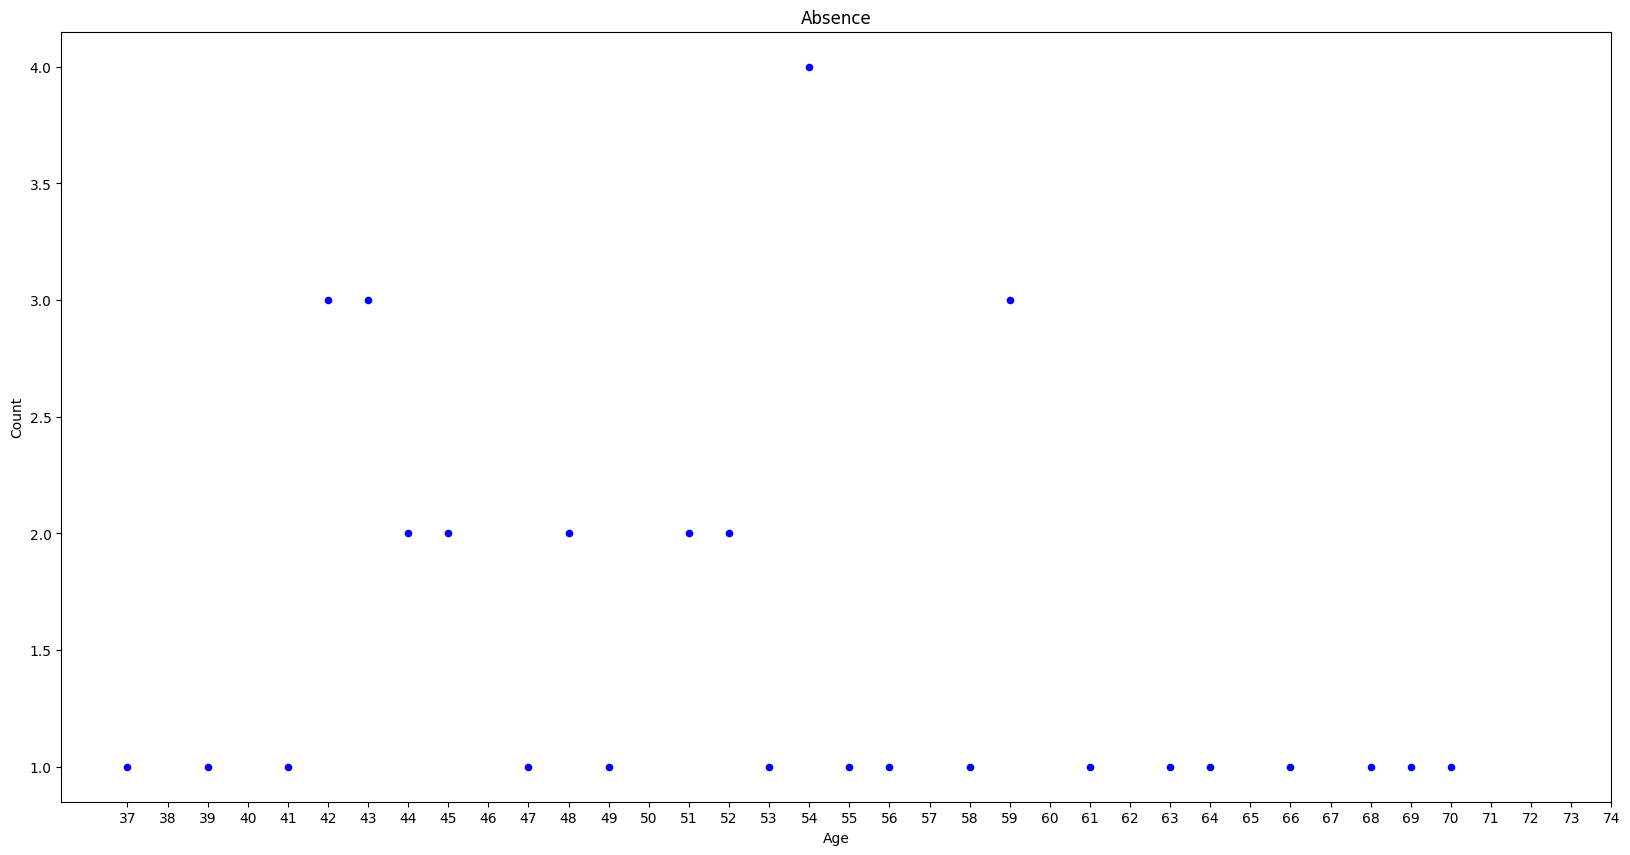

In [43]:
Plot_1 = plot_chol_size()
Plot_1.main(df_men_abs_above_group_age_size['Age'], df_men_abs_above_group_age_size['Count'], df_men_abs['Heart Disease'][0])

In [44]:
df_men_group_age_size = df_men.groupby(df_men['Age']).size().to_frame('Count').reset_index().astype(int)
#df_men_group_age_size

In [45]:
class Probability():
    def __init__(self):
        self.probability_abs = {}
        self.df_prob = []
    def probability(self, x, y):
        for i in range(0, (len(x))):
            for j in range(0, (len(y))):
                if x['Age'][i] == y['Age'][j]:
                    self.probability_abs.update({x['Age'][i]:
                                             x['Count'][i] / y['Count'][j]})
        #return self.probability_abs

    def probability_dataframe(self, x, y):
        self.probability(x,y)
        self.df_prob = pd.DataFrame(list(self.probability_abs.items()), 
                        columns = ['Age', 'Probability'])
        return self.df_prob

In [48]:
Prob_1 = Probability()
df_prob_above_abs = Prob_1.probability_dataframe(df_men_abs_above_group_age_size, df_men_group_age_size)
#df_prob_above_abs

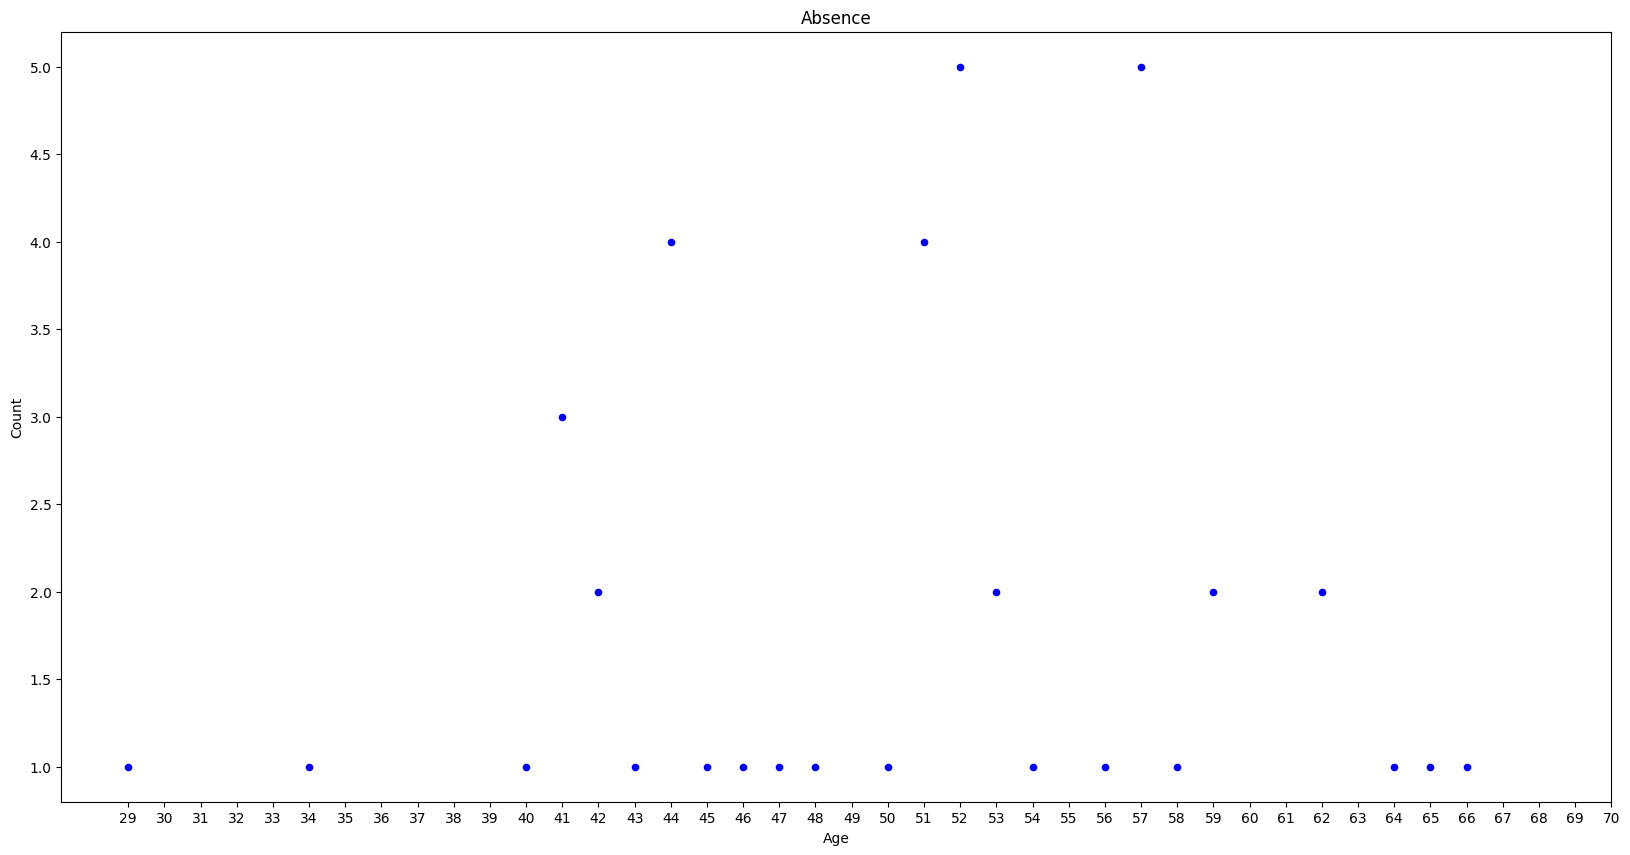

In [49]:
Plot_2 = plot_chol_size()
Plot_2.main(df_men_abs_below_group_age_size['Age'], df_men_abs_below_group_age_size['Count'], df_men_abs['Heart Disease'][0])

In [51]:
Prob_2 = Probability()
df_prob_below_abs = Prob_2.probability_dataframe(df_men_abs_below_group_age_size, df_men_group_age_size)
#df_prob_below_abs